As a project for Data Science course, we have some data from imdb and have to decide if the movie is good or not. 

Are there any attributes of movie that decide how well a movie is going to do on the box office. Or do we have to wait for moview release and wait for the rank that a movie has received from the critics... 

I think, the movie's success is dependent on a lot of factors... A few of them come to my mind easily.. So let's test the hypothesis about the movie's success

1. I think, movie's success is dependent on the actors
2. I also think movie's success is dependent on the director
3. Marketing
4. year/month of movie release
5. Storyline
6. Tagline

Let's explore and see what is important in predicting a successful movie .. :)


In [282]:
from imdbpie import Imdb
import pandas as pd
imdb = Imdb()
imdb = Imdb(anonymize=True) # to proxy requests

In [283]:
df = imdb.top_250()

In [284]:
df[0]

{u'can_rate': True,
 u'image': {u'height': 1388,
  u'url': u'https://images-na.ssl-images-amazon.com/images/M/MV5BODU4MjU4NjIwNl5BMl5BanBnXkFtZTgwMDU2MjEyMDE@._V1_.jpg',
  u'width': 933},
 u'num_votes': 1730248,
 u'rating': 9.3,
 u'tconst': u'tt0111161',
 u'title': u'The Shawshank Redemption',
 u'type': u'feature',
 u'year': u'1994'}

In [285]:
tconst = [df[i].get('tconst') for i in range(0,len(df))]

In [286]:
imdb_data = pd.DataFrame(
    {'rating': rating,
     'Movie_ref': tconst,
     'title': title,
     'image' : image,
     'num_votes':num_votes,
     'year':year,
     'can_rate':can_rate,
     'type':type1
    })

In [384]:
imdb_data.head()

,Movie_ref,can_rate,image,num_votes,rating,title,type,year
0,tt0111161,True,{u'url': u'https://images-na.ssl-images-amazon...,1729142,9.3,<Title: Castle in the Sky - tt0092067>,feature,1994
1,tt0068646,True,{u'url': u'https://images-na.ssl-images-amazon...,1181594,9.2,<Title: Castle in the Sky - tt0092067>,feature,1972
2,tt0071562,True,{u'url': u'https://images-na.ssl-images-amazon...,810181,9.0,<Title: Castle in the Sky - tt0092067>,feature,1974
3,tt0468569,True,{u'url': u'https://images-na.ssl-images-amazon...,1714315,9.0,<Title: Castle in the Sky - tt0092067>,feature,2008
4,tt0050083,True,{u'url': u'https://images-na.ssl-images-amazon...,461399,8.9,<Title: Castle in the Sky - tt0092067>,feature,1957


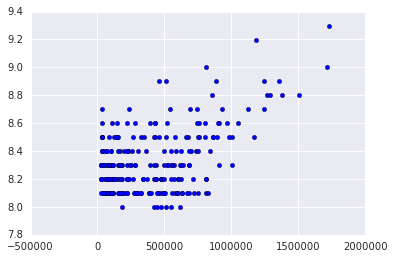

In [328]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(imdb_data.num_votes, imdb_data.rating)

The higher the votes, the higher the rating... Good.. we have one good variable which will help in predicting the ratings

(array([ 69.,  43.,  44.,  56.,  16.,   8.,  10.,   2.,   0.,   2.]),
 array([ 8.  ,  8.13,  8.26,  8.39,  8.52,  8.65,  8.78,  8.91,  9.04,
         9.17,  9.3 ]),
 <a list of 10 Patch objects>)

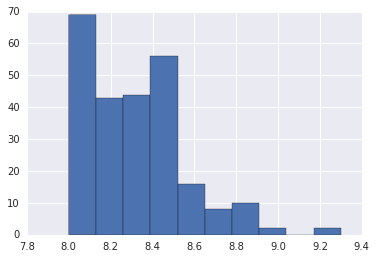

In [289]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(imdb_data.rating, bins =10)

Oh.. No.... These are all top rated movies.. none of them are rated less than 8... So this will be a problem in regression problem to predict the ratings

It doesn't look like we have a lot of features in this data... Can_rate and type are the 2 features which do not look much useful... So will have to exclude these features from analysis. Also we have the photo image which also might not be useful at all.. Hence, we might need to get some other data...

It looks like we can get more information about these movies from imdb itself... so let's see what can we get'

In [291]:
title = imdb.get_title_by_id("tt0468569")
print title.cast_summary
print title.certification
print title.cover_url
print title.creators
#print title.credits
print title.directors_summary
print title.genres
#print title.plot_outline
print title.plots
#print title.poster_url
print title.rating
print title.release_date
print title.runtime
print title.tagline
print title.year
print title.writers_summary

[<Person: u'Christian Bale' (u'nm0000288')>, <Person: u'Heath Ledger' (u'nm0005132')>, <Person: u'Aaron Eckhart' (u'nm0001173')>, <Person: u'Michael Caine' (u'nm0000323')>]
PG-13
https://images-na.ssl-images-amazon.com/images/M/MV5BMTMxNTMwODM0NF5BMl5BanBnXkFtZTcwODAyMTk2Mw@@._V1__SX214_.jpg
[]
[<Person: u'Christopher Nolan' (u'nm0634240')>]
[u'Action', u'Crime', u'Drama', u'Thriller']
[u'Set within a year after the events of Batman Begins, Batman, Lieutenant James Gordon, and new district attorney Harvey Dent successfully begin to round up the criminals that plague Gotham City until a mysterious and sadistic criminal mastermind known only as the Joker appears in Gotham, creating a new wave of chaos. Batman\'s struggle against the Joker becomes deeply personal, forcing him to "confront everything he believes" and improve his technology to stop him. A love triangle develops between Bruce Wayne, Dent and Rachel Dawes.', u'The follow-up to Batman Begins, The Dark Knight reunites director 

Let's get the additional data from imdb itself

In [292]:
Movie_title = []
plots =[]
Movie_ref = []
cast_1 = []
cast_2 = []
cast_3 = []
cast_4 = []
certification = []
cover_url = []
creators = []
directors_summary = []
genres_1 = []
genres_2 = []
genres_3 = []
genres_4 = []
rating = []
release_date = []
runtime = []
tagline = []
year = []
writers_summary = []
for ref in tconst:
    title = imdb.get_title_by_id(ref)
    Movie_title.append(title.title)
    plots.append(title.plots)
    Movie_ref.append(ref)
    cast_1.append(title.cast_summary[0])
    cast_2.append(title.cast_summary[1] )
    try:
        if len(title.cast_summary[2]) > 0:
            cast_3.append(title.cast_summary[2])
        else:
            cast_3.append(" ")
    except:
        pass
    try:
        if len(title.cast_summary[3]) > 0:
            cast_4.append(title.cast_summary[3] )
        else:
            cast_4.append(" ")
    except:
        pass
    certification.append(title.certification)
    cover_url.append(title.cover_url)
    creators.append(title.creators)
    directors_summary.append(title.directors_summary)
    genres_1.append(title.genres[0])
    try:
        if len(title.genres[1]) > 0:
            genres_2.append(title.genres[1])
        else:
            genres_2.append(" ")
    except:
        pass
    try:
        if len(title.genres[2]) > 0:
            genres_3.append(title.genres[2])
        else:
            genres_3.append(" ")
    except:
        pass
    try:
        if len(title.genres[3])>0:
            genres_4.append(title.genres[3])
        else:
            genres_4.append(" ")
    except:
        pass
    rating.append(title.rating)
    release_date.append(title.release_date)
    runtime.append(title.runtime)
    tagline.append(title.tagline)
    year.append(title.year)
    writers_summary.append(title.writers_summary)
    #print Movie_title
    #print cast_summary


In [293]:
print len(Movie_title)
print len(plots)
print len(Movie_ref)
print len(cast_1)
print len(cast_2)
print len(cast_3)
print len(cast_4)
print len(certification)
print len(cover_url)
print len(creators)
print len(directors_summary)
print len(genres_1)
print len(genres_2)
print len(genres_3)
print len(genres_4)
print len(rating)
print len(release_date)
print len(runtime)
print len(tagline)
print len(year)
print len(writers_summary)

250
250
250
250
250
0
0
250
250
250
250
250
227
150
70
250
250
250
250
250
250


It looks like we do not have all variables populated properly and when I try to merge it, I have a problem so lets select only those variables where data is fully populated

In [294]:
imdb_base = pd.DataFrame({'title': Movie_title,
             'plots':plots,
             'Movie_ref':Movie_ref,
            'cast_1':cast_1,
            'cast_2':cast_2,
            'certification':certification,
            'cover_url':cover_url,
            'creators':creators,
            'directors_summary':directors_summary,
            'genres_1':genres_1,
            'rating':rating,
            'release_date':release_date,
            'runtime':runtime,
            'tagline':tagline,
            'year':year
            }) 

## Let's try to get the summary of the movie in one sentence

In [295]:
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import nltk.data

class SimpleSummarizer:

	def reorder_sentences( self, output_sentences, input ):
		output_sentences.sort( lambda s1, s2:
			input.find(s1) - input.find(s2) )
		return output_sentences
	
	def get_summarized(self, input, num_sentences ):
		# TODO: allow the caller to specify the tokenizer they want
		# TODO: allow the user to specify the sentence tokenizer they want
		
		tokenizer = RegexpTokenizer('\w+')
		
		# get the frequency of each word in the input
		base_words = [word.lower()
			for word in tokenizer.tokenize(input)]
		words = [word for word in base_words if word not in stopwords.words()]
		word_frequencies = FreqDist(words)
		
		# now create a set of the most frequent words
		most_frequent_words = [pair[0] for pair in
			word_frequencies.items()[:100]]
		
		# break the input up into sentences.  working_sentences is used
		# for the analysis, but actual_sentences is used in the results
		# so capitalization will be correct.
		
		sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
		actual_sentences = sent_detector.tokenize(input)
		working_sentences = [sentence.lower()
			for sentence in actual_sentences]

		# iterate over the most frequent words, and add the first sentence
		# that inclues each word to the result.
		output_sentences = []

		for word in most_frequent_words:
			for i in range(0, len(working_sentences)):
				if (word in working_sentences[i]
				  and actual_sentences[i] not in output_sentences):
					output_sentences.append(actual_sentences[i])
					break
				if len(output_sentences) >= num_sentences: break
			if len(output_sentences) >= num_sentences: break
			
		# sort the output sentences back to their original order
		return self.reorder_sentences(output_sentences, input)
	
	def summarize(self, input, num_sentences):
		return " ".join(self.get_summarized(input, num_sentences))

In [296]:
ss=SimpleSummarizer()
ss.summarize(''.join(imdb_base['plots'][0]),1)

u"Andy becomes friends with prison 'fixer' Red, and Andy epitomizes why it is crucial to have dreams."

Looks like the summary function is working... we have got 1 sentence summary from movie storyline

In [297]:
movie_summary = []
for i in range(0,len(imdb_base['plots'])):
    movie_summary.append(ss.summarize(''.join(imdb_base['plots'][i]),1))

In [298]:
len(movie_summary)

250

In [299]:
movie_summary = pd.DataFrame({'movie_summary': movie_summary})

In [300]:
movie_summary.head()

,movie_summary
0,"Andy becomes friends with prison 'fixer' Red, ..."
1,Micheal seems to be uninterested in being a pa...
2,With the murders of the heads of the other fou...
3,With the help of Lt. Jim Gordon and District A...
4,What begins as an open-and-shut case of murder...


In [301]:
imdb_base1 = imdb_base.copy()
#imdb_base1 = pd.merge(['imdb_base1','movie_summary'], axis=1) 
imdb_base1 = pd.merge(left=imdb_base1, right=movie_summary, how='outer', left_index=True,
right_index=True)

In [302]:
imdb_base1.head()

,Movie_ref,cast_1,cast_2,certification,cover_url,creators,directors_summary,genres_1,plots,rating,release_date,runtime,tagline,title,year,movie_summary
0,tt0111161,<Person: Tim Robbins (nm0000209)>,<Person: Morgan Freeman (nm0000151)>,R,https://images-na.ssl-images-amazon.com/images...,[],[<Person: Frank Darabont (nm0001104)>],Crime,[Chronicles the experiences of a formerly succ...,9.3,1994-10-14,8520,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,1994,"Andy becomes friends with prison 'fixer' Red, ..."
1,tt0068646,<Person: Marlon Brando (nm0000008)>,<Person: Al Pacino (nm0000199)>,R,https://images-na.ssl-images-amazon.com/images...,[],[<Person: Francis Ford Coppola (nm0000338)>],Crime,[When the aging head of a famous crime family ...,9.2,1972-03-24,10500,An offer you can't refuse.,The Godfather,1972,Micheal seems to be uninterested in being a pa...
2,tt0071562,<Person: Al Pacino (nm0000199)>,<Person: Robert De Niro (nm0000134)>,R,https://images-na.ssl-images-amazon.com/images...,[],[<Person: Francis Ford Coppola (nm0000338)>],Crime,[The continuing saga of the Corleone crime fam...,9.0,1974-12-20,12120,None,The Godfather: Part II,1974,With the murders of the heads of the other fou...
3,tt0468569,<Person: Christian Bale (nm0000288)>,<Person: Heath Ledger (nm0005132)>,PG-13,https://images-na.ssl-images-amazon.com/images...,[],[<Person: Christopher Nolan (nm0634240)>],Action,[Set within a year after the events of Batman ...,9.0,2008-07-18,9120,Why So Serious?,The Dark Knight,2008,With the help of Lt. Jim Gordon and District A...
4,tt0050083,<Person: Henry Fonda (nm0000020)>,<Person: Lee J. Cobb (nm0002011)>,Approved,https://images-na.ssl-images-amazon.com/images...,[],[<Person: Sidney Lumet (nm0001486)>],Crime,[The defense and the prosecution have rested a...,8.9,1957-04,5760,Life Is In Their Hands -- Death Is On Their Mi...,12 Angry Men,1957,What begins as an open-and-shut case of murder...


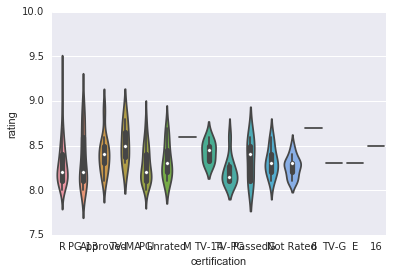

In [303]:
import numpy as np
import seaborn as sns

sns.violinplot(imdb_base1.certification, imdb_base1.rating)

We do not have enough data points for all types of movies.. Either we can merge these categories where we see 1/2 movies  or we can just dreate dummy variables for each of these categories. For now, lets just create dummy variables for all of them.

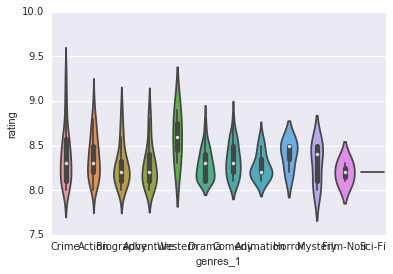

In [304]:
sns.violinplot(imdb_base1.genres_1, imdb_base1.rating)

Lets create dummies for genre as well

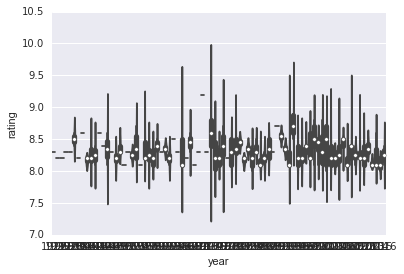

In [305]:
sns.violinplot(imdb_base1.year, imdb_base1.rating)

There are more successful movies in recent years but we do not have more information on number of movies released in recent years, so we will not be using this variable in the model

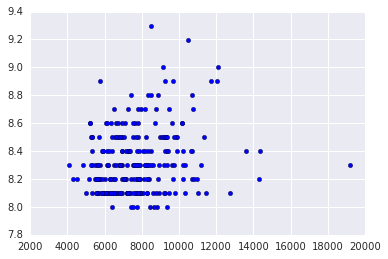

In [306]:
plt.scatter(imdb_base1.runtime, imdb_base1.rating)

We found in the previous analysis that num_votes was quite significant in predicting the rating... Let's get num_votes in this data too

In [334]:
imdb_base.columns

Index([u'Movie_ref', u'cast_1', u'cast_2', u'certification', u'cover_url',
       u'creators', u'directors_summary', u'genres_1', u'plots', u'rating',
       u'release_date', u'runtime', u'tagline', u'title', u'year'],
      dtype='object')

In [338]:
imdb_base_temp = imdb_data.drop(['can_rate', 'image', 'rating', 'type','year','title'], axis=1)
imdb_final = pd.merge(left=imdb_base_temp, right=imdb_base1, how='inner', left_index=True,right_index=True)


,Movie_ref_x,num_votes,Movie_ref_y,cast_1,cast_2,certification,cover_url,creators,directors_summary,genres_1,plots,rating,release_date,runtime,tagline,title,year,movie_summary
0,tt0111161,1729142,tt0111161,<Person: Tim Robbins (nm0000209)>,<Person: Morgan Freeman (nm0000151)>,R,https://images-na.ssl-images-amazon.com/images...,[],[<Person: Frank Darabont (nm0001104)>],Crime,[Chronicles the experiences of a formerly succ...,9.3,1994-10-14,8520,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,1994,"Andy becomes friends with prison 'fixer' Red, ..."
1,tt0068646,1181594,tt0068646,<Person: Marlon Brando (nm0000008)>,<Person: Al Pacino (nm0000199)>,R,https://images-na.ssl-images-amazon.com/images...,[],[<Person: Francis Ford Coppola (nm0000338)>],Crime,[When the aging head of a famous crime family ...,9.2,1972-03-24,10500,An offer you can't refuse.,The Godfather,1972,Micheal seems to be uninterested in being a pa...
2,tt0071562,810181,tt0071562,<Person: Al Pacino (nm0000199)>,<Person: Robert De Niro (nm0000134)>,R,https://images-na.ssl-images-amazon.com/images...,[],[<Person: Francis Ford Coppola (nm0000338)>],Crime,[The continuing saga of the Corleone crime fam...,9.0,1974-12-20,12120,Missing,The Godfather: Part II,1974,With the murders of the heads of the other fou...
3,tt0468569,1714315,tt0468569,<Person: Christian Bale (nm0000288)>,<Person: Heath Ledger (nm0005132)>,PG-13,https://images-na.ssl-images-amazon.com/images...,[],[<Person: Christopher Nolan (nm0634240)>],Action,[Set within a year after the events of Batman ...,9.0,2008-07-18,9120,Why So Serious?,The Dark Knight,2008,With the help of Lt. Jim Gordon and District A...
4,tt0050083,461399,tt0050083,<Person: Henry Fonda (nm0000020)>,<Person: Lee J. Cobb (nm0002011)>,Approved,https://images-na.ssl-images-amazon.com/images...,[],[<Person: Sidney Lumet (nm0001486)>],Crime,[The defense and the prosecution have rested a...,8.9,1957-04,5760,Life Is In Their Hands -- Death Is On Their Mi...,12 Angry Men,1957,What begins as an open-and-shut case of murder...


In [347]:
imdb_final.drop(['creators', 'Movie_ref_y', 'release_date'], axis=1).head()

,Movie_ref_x,num_votes,cast_1,cast_2,certification,cover_url,directors_summary,genres_1,plots,rating,runtime,tagline,title,year,movie_summary
0,tt0111161,1729142,<Person: Tim Robbins (nm0000209)>,<Person: Morgan Freeman (nm0000151)>,R,https://images-na.ssl-images-amazon.com/images...,[<Person: Frank Darabont (nm0001104)>],Crime,[Chronicles the experiences of a formerly succ...,9.3,8520,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,1994,"Andy becomes friends with prison 'fixer' Red, ..."
1,tt0068646,1181594,<Person: Marlon Brando (nm0000008)>,<Person: Al Pacino (nm0000199)>,R,https://images-na.ssl-images-amazon.com/images...,[<Person: Francis Ford Coppola (nm0000338)>],Crime,[When the aging head of a famous crime family ...,9.2,10500,An offer you can't refuse.,The Godfather,1972,Micheal seems to be uninterested in being a pa...
2,tt0071562,810181,<Person: Al Pacino (nm0000199)>,<Person: Robert De Niro (nm0000134)>,R,https://images-na.ssl-images-amazon.com/images...,[<Person: Francis Ford Coppola (nm0000338)>],Crime,[The continuing saga of the Corleone crime fam...,9.0,12120,Missing,The Godfather: Part II,1974,With the murders of the heads of the other fou...
3,tt0468569,1714315,<Person: Christian Bale (nm0000288)>,<Person: Heath Ledger (nm0005132)>,PG-13,https://images-na.ssl-images-amazon.com/images...,[<Person: Christopher Nolan (nm0634240)>],Action,[Set within a year after the events of Batman ...,9.0,9120,Why So Serious?,The Dark Knight,2008,With the help of Lt. Jim Gordon and District A...
4,tt0050083,461399,<Person: Henry Fonda (nm0000020)>,<Person: Lee J. Cobb (nm0002011)>,Approved,https://images-na.ssl-images-amazon.com/images...,[<Person: Sidney Lumet (nm0001486)>],Crime,[The defense and the prosecution have rested a...,8.9,5760,Life Is In Their Hands -- Death Is On Their Mi...,12 Angry Men,1957,What begins as an open-and-shut case of murder...


In [345]:
imdb_final.rating_flag = imdb_final.rating <=8.3

In [346]:
imdb_final.rating_flag.value_counts()

True     156
False     94
Name: rating, dtype: int64

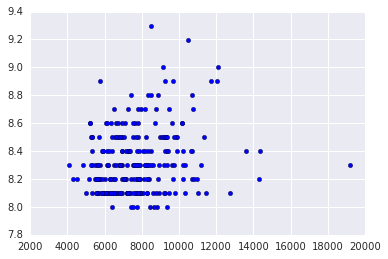

In [339]:
plt.scatter(imdb_final.runtime, imdb_final.rating)

### Lets try to extract features from tagline

In [307]:
imdb_base1.tagline = imdb_base1.tagline.fillna("Missing")

In [308]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
cv = CountVectorizer(stop_words="english", max_features=20, ngram_range=(1, 3), analyzer='word')
print cv

cv.fit(imdb_base1.tagline)

CountVectorizer(analyzer='word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=20, min_df=1,
        ngram_range=(1, 3), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)


CountVectorizer(analyzer='word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=20, min_df=1,
        ngram_range=(1, 3), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [309]:
cv.get_feature_names()

[u'adventure',
 u'film',
 u'great',
 u'greatest',
 u'know',
 u'life',
 u'like',
 u'love',
 u'make',
 u'man',
 u'men',
 u'missing',
 u'new',
 u'picture',
 u'release',
 u'remember',
 u'screen',
 u'story',
 u'time',
 u'world']

In [310]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
cv1 = CountVectorizer(stop_words="english", max_features=20, ngram_range=(1, 3), analyzer='word')
print cv1
cv1.fit(imdb_base1.movie_summary)

CountVectorizer(analyzer='word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=20, min_df=1,
        ngram_range=(1, 3), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)


CountVectorizer(analyzer='word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=20, min_df=1,
        ngram_range=(1, 3), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [311]:
cv1.get_feature_names()

[u'detective',
 u'family',
 u'father',
 u'finds',
 u'help',
 u'life',
 u'lives',
 u'love',
 u'man',
 u'men',
 u'new',
 u'old',
 u'people',
 u'soon',
 u'story',
 u'time',
 u'war',
 u'wife',
 u'world',
 u'years']

In [312]:
feat = list(set(cv.get_feature_names()) | set(cv1.get_feature_names()))

In [313]:
len(feat)

32

In [319]:
cast_all = (set(imdb_base1.cast_1) | set(imdb_base1.cast_2))

In [365]:
X = imdb_final[['num_votes', 'cast_1' , 'cast_2', 'certification' , 'cover_url', 'directors_summary', 'genres_1' , 'plots', 'runtime', 'tagline', 'year', 'movie_summary']]
X_new = imdb_final[['num_votes', 'certification' , 'genres_1' , 'runtime',  'year']]
y = imdb_final["rating"] <=8.3

Run logistic regression on just numeric variables

In [356]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

X_new["certification"] = le.fit_transform(X_new["certification"])
cert = pd.get_dummies(X_new["certification"], prefix="Cert", drop_first=True)

X_new["genres_1"] = le.fit_transform(X_new["genres_1"])
genre = pd.get_dummies(X_new["genres_1"], prefix="Genre", drop_first=True)

/Users/ipm/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ipm/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [361]:
imdb_final1 = pd.concat([genre, cert, X_new], axis=1)

In [364]:
imdb_final1.drop(["certification", "genres_1"], axis=1).head()

,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Genre_7,Genre_8,Genre_9,Genre_10,...,Cert_9,Cert_10,Cert_11,Cert_12,Cert_13,Cert_14,Cert_15,num_votes,runtime,year
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1729142,8520,1994
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1181594,10500,1972
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,810181,12120,1974
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1714315,9120,2008
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,461399,5760,1957


In [366]:
X = imdb_final1

In [367]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model = LogisticRegression()
# that's accuracy score for logistic regression
scores = cross_val_score(model, X, y)

print('CV scores: {}'.format(scores))
print('Average CVScore: {:0.3f} +/- {:0.3f}'.format(scores.mean(), scores.std()))


CV scores: [ 0.85714286  0.6746988   0.60240964]
Average CVScore: 0.711 +/- 0.107


In [369]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
# that's accuracy score for logistic regression
scores = cross_val_score(model, X_train, y_train)
print('CV scores: {}'.format(scores))
print('Average CVScore: {:0.3f} +/- {:0.3f}'.format(scores.mean(), scores.std()))

CV scores: [ 0.64179104  0.67164179  0.72727273]
Average CVScore: 0.680 +/- 0.035


In [370]:
from sklearn.metrics import accuracy_score, confusion_matrix
model=LogisticRegression()
model.fit(X_train, y_train)
predictions=model.predict(X_test)
print("accuracy is", accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print("remember the distribution is uneven at:")
print(y_test.value_counts())

('accuracy is', 0.78000000000000003)
[[10 10]
 [ 1 29]]
remember the distribution is uneven at:
True     30
False    20
Name: rating, dtype: int64


We have good accuracy of 78%.. Not bad with just 4 features

Let's try adding features which we derived based on tagline. Let's add these features to regressin and see if we get any more accuracy over our base model

In [380]:
feat = pd.DataFrame(cv1.transform(imdb_base1.movie_summary).todense(), columns=cv.get_feature_names())

In [381]:
X_new1 = pd.concat([X, feat], axis=1)
X_new1.isnull().sum()

Genre_1          0
Genre_2          0
Genre_3          0
Genre_4          0
Genre_5          0
Genre_6          0
Genre_7          0
Genre_8          0
Genre_9          0
Genre_10         0
Genre_11         0
Cert_1           0
Cert_2           0
Cert_3           0
Cert_4           0
Cert_5           0
Cert_6           0
Cert_7           0
Cert_8           0
Cert_9           0
Cert_10          0
Cert_11          0
Cert_12          0
Cert_13          0
Cert_14          0
Cert_15          0
num_votes        0
certification    0
genres_1         0
runtime          0
year             0
adventure        0
film             0
great            0
greatest         0
know             0
life             0
like             0
love             0
make             0
man              0
men              0
missing          0
new              0
picture          0
release          0
remember         0
screen           0
story            0
time             0
world            0
dtype: int64

In [ ]:
X_new1

In [382]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new1, y, test_size=0.2, random_state=42)

model = LogisticRegression()
# that's accuracy score for logistic regression
scores = cross_val_score(model, X_train, y_train)
print('CV scores: {}'.format(scores))
print('Average CVScore: {:0.3f} +/- {:0.3f}'.format(scores.mean(), scores.std()))

CV scores: [ 0.65671642  0.70149254  0.71212121]
Average CVScore: 0.690 +/- 0.024


In [383]:
from sklearn.metrics import accuracy_score, confusion_matrix
model=LogisticRegression()
model.fit(X_train, y_train)
predictions=model.predict(X_test)
print("accuracy is", accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print("remember the distribution is uneven at:")
print(y_test.value_counts())

('accuracy is', 0.83999999999999997)
[[13  7]
 [ 1 29]]
remember the distribution is uneven at:
True     30
False    20
Name: rating, dtype: int64


Good ... The model accuracy has improved to 84%... Which mean's we are able to predict movies correctly if there are going to be having score >8.3

Future Improvements : 
1. I would like to use features based on the movie pictures... The hypothesis I want to test, if the number of casts affect the success of the movie. 
2. I would also like to build the profiles for each director and actor and would like to see if the past performance of actor or director affects the performance of the next movie
3. If I had more time, I would have collected/scraped more data from other websites to make the predictions more robust
4. The data I used above had all movies with score >8. Ideally, I would like to have all movies having all scores and then predict the performance of the movie